In [58]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import pandas as ps

%cd /content/drive/MyDrive/CS5691_PRML/Assignment_1/

/content/drive/MyDrive/CS5691_PRML/Assignment_1


The files were taken from mounting the local google drive. So, to run on another account, mount your local drive and change the directory route and file names accordingly.

In [59]:
# Importing the dataset
dataset = ps.read_csv('Q1_train_25.csv')

# Split dataset into training and validation set
dataset = dataset.sample(frac=1)
ratio = 0.8
total_rows = dataset.shape[0]
train_rows = int(total_rows * ratio)

Train_data = dataset[0:train_rows]
Val_data = dataset[train_rows:]

X1row = Val_data.iloc[:, 0].values
X2row = Val_data.iloc[:, 1].values
Y = Val_data.iloc[:, 2].values
oneRow = np.ones((len(X1row), 1))

Train_X1 = Train_data.iloc[:, 0].values
Train_X2 = Train_data.iloc[:, 1].values
Train_Y = Train_data.iloc[:, 2].values
Train_oneRow = np.ones((len(Train_X1), 1))

Train_A = np.concatenate((Train_X1.reshape(-1, 1), Train_X2.reshape(-1, 1), Train_oneRow), axis = 1)

test = ps.read_csv('Q1_test_25.csv')
testX1 = test.iloc[:, 0].values
testX2 = test.iloc[:, 1].values
testY = test.iloc[:, 2].values

testOneRow = np.ones((len(testX1), 1))

testA = np.concatenate((testX1.reshape(-1, 1), testX2.reshape(-1, 1), testOneRow), axis = 1)

A = np.concatenate((X1row.reshape(-1, 1), X2row.reshape(-1, 1), oneRow), axis = 1)
B = Y.T

Atr = A.T
M1 = np.matmul(Atr, A)
M2 = np.linalg.inv(M1)
M3 = np.matmul(M2, Atr)
Q = np.matmul(M3, B)

In [60]:
Pred = np.matmul(Train_A, Q)
Val_pred = np.matmul(A, Q)
testPred = np.matmul(testA, Q)

mse = np.square(np.subtract(Train_Y, Pred)).mean()
Val_mse = np.square(np.subtract(Y, Val_pred)).mean()
testMse = np.square(np.subtract(testY, testPred)).mean()

print("*********************")
print("LINEAR REGRESSION")
print('MSE for the Validation data is: ')
print(Val_mse)
print('MSE for the training data is: ')
print(mse)
print('MSE for the test data is: ')
print(testMse)

*********************
LINEAR REGRESSION
MSE for the Validation data is: 
1857248452.0744417
MSE for the training data is: 
2055815860.979928
MSE for the test data is: 
1388678029.4955003


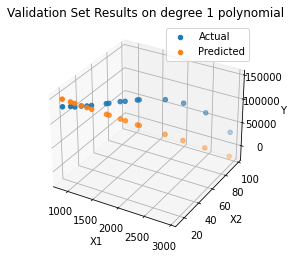

In [61]:
# Visualising the Validation set results
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Validation Set Results on degree 1 polynomial')
ax.scatter3D(X1row, X2row, Y, 'blue')
ax.scatter3D(X1row, X2row, Val_pred, 'red')
plt.legend(['Actual', 'Predicted'])
plt.show()

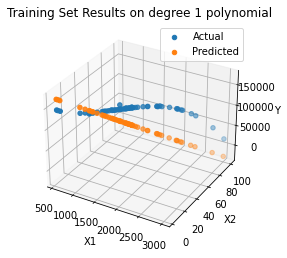

In [62]:
# Visualising the Training set results
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Training Set Results on degree 1 polynomial')
ax.scatter3D(Train_X1, Train_X2, Train_Y, 'blue')
ax.scatter3D(Train_X1, Train_X2, Pred, 'red')
plt.legend(['Actual', 'Predicted'])
plt.show()

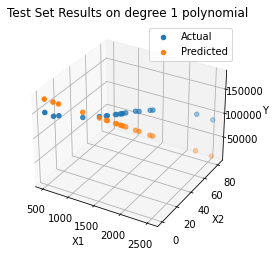

In [63]:
# Visualising the Test set results
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Test Set Results on degree 1 polynomial')
ax.scatter3D(testX1, testX2, testY, 'blue')
ax.scatter3D(testX1, testX2, testPred, 'red')
plt.legend(['Actual', 'Predicted'])
plt.show()

MSE for the Validation dataset on degree 2
16227966271.41655


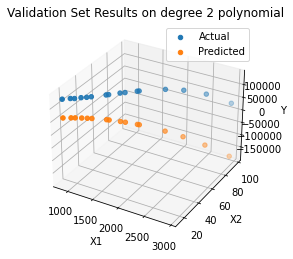

MSE for the Training dataset on degree 2
15751615600.720749


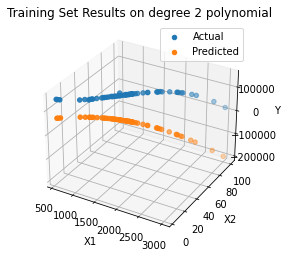

MSE for the Validation dataset on degree 3
503383039.85659146


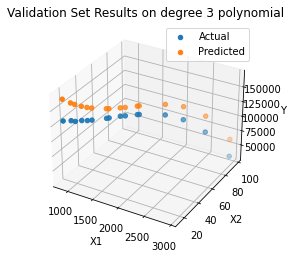

MSE for the Training dataset on degree 3
485605931.07474965


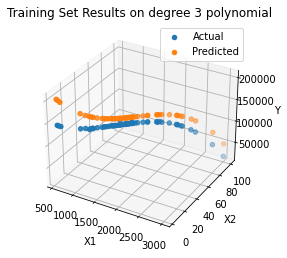

MSE for the Validation dataset on degree 4
2159345034.405201


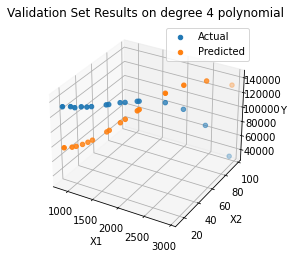

MSE for the Training dataset on degree 4
1453501653.533832


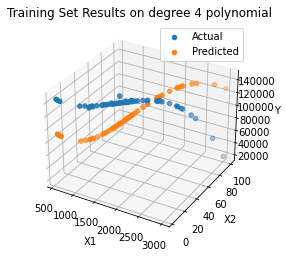

MSE for the Validation dataset on degree 5
9413168829.868149


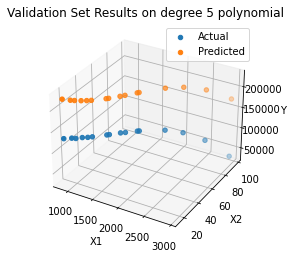

MSE for the Training dataset on degree 5
8903023335.472652


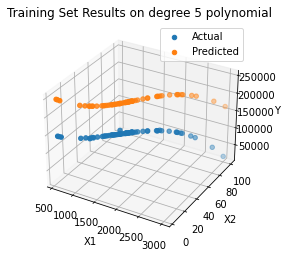

MSE for the Validation dataset on degree 6
380593990815.15906


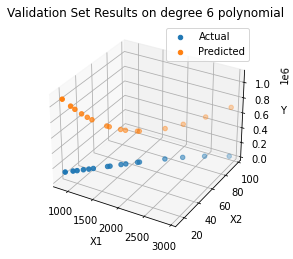

MSE for the Training dataset on degree 6
346801659960.8731


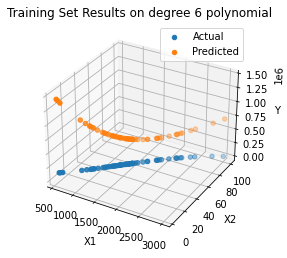

In [64]:
# Polynomial Regression
deg = 6
index = np.arange(1, 7)
valMSE = np.array(Val_mse)
trMSE = np.array(mse)
tsMSE = np.array(testMse)
trPred = np.array(Pred)
tsPred = np.array(testPred)
for i in range(2, deg + 1):
    for j in range(0, i):
        A = np.concatenate((A, (X1row ** (i - j) * X2row ** j).reshape(-1, 1)), axis = 1)
        Train_A = np.concatenate((Train_A, (Train_X1 ** (i - j) * Train_X2 ** j).reshape(-1, 1)), axis = 1)
        testA = np.concatenate((testA, (testX1 ** (i - j) * testX2 ** j).reshape(-1, 1)), axis = 1)
    Atrans = A.T
    M1 = np.matmul(Atrans, A)
    M2 = np.linalg.inv(M1)
    M3 = np.matmul(M2, Atrans)
    Q = np.matmul(M3, B)

    valPred = np.matmul(A, Q)
    Val_mse = np.square(np.subtract(Y, valPred)).mean()
    print('MSE for the Validation dataset on degree ' + str(i))
    print(Val_mse)

    # Visualising the Validation set results
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Y')
    ax.set_title('Validation Set Results on degree %d polynomial' % (i))
    ax.scatter3D(X1row, X2row, Y, 'blue')
    ax.scatter3D(X1row, X2row, valPred, 'red')
    plt.legend(['Actual', 'Predicted'])
    plt.show()
    
    Pred = np.matmul(Train_A, Q)
    np.append(trPred, Pred)
    mse = np.square(np.subtract(Train_Y, Pred)).mean()
    print('MSE for the Training dataset on degree ' + str(i))
    print(mse)

    testPred = np.matmul(testA, Q)
    np.append(tsPred, testPred)
    testMse = np.square(np.subtract(testY, testPred)).mean()
    trMSE = np.append(trMSE, mse)
    tsMSE = np.append(tsMSE, testMse)
    valMSE = np.append(valMSE, Val_mse)
    
    # Visualising the Training set results
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Y')
    ax.set_title('Training Set Results on degree %d polynomial' % (i))
    ax.scatter3D(Train_X1, Train_X2, Train_Y, 'blue')
    ax.scatter3D(Train_X1, Train_X2, Pred, 'red')
    plt.legend(['Actual', 'Predicted'])
    plt.show()


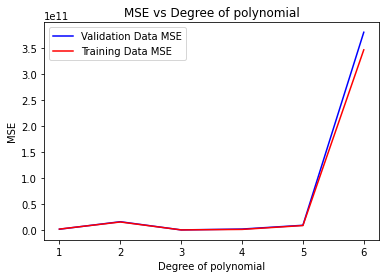

In [65]:
fig = plt.figure()
plt.xlabel('Degree of polynomial')
plt.ylabel('MSE')
plt.title('MSE vs Degree of polynomial')
plt.plot(index, valMSE, 'blue')
plt.plot(index, trMSE, 'red')
plt.legend(['Validation Data MSE', 'Training Data MSE'])
plt.show()

In [66]:
# Tell error for best degree
print('Best degree is %d' % (np.argmin(valMSE) + 1))
print('MSE on training data for best degree is %f' % (trMSE[np.argmin(valMSE)]))
print('MSE on test data for best degree is %f' % (tsMSE[np.argmin(valMSE)]))

Best degree is 3
MSE on training data for best degree is 485605931.074750
MSE on test data for best degree is 839538047.290305


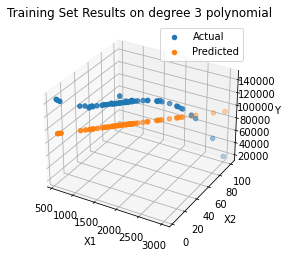

In [67]:
deg = np.argmin(valMSE) + 1

# Scatter plot of best model vs expected for training data
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Training Set Results on degree %d polynomial' % deg)
ax.scatter3D(Train_X1, Train_X2, Train_Y, 'blue')
ax.scatter3D(Train_X1, Train_X2, trPred[deg - 1], 'red')
plt.legend(['Actual', 'Predicted'])
plt.show()

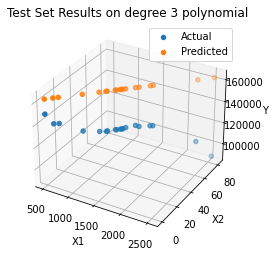

In [68]:
deg = np.argmin(valMSE) + 1

# Scatter plot of best model vs expected for testing data
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Test Set Results on degree %d polynomial' % deg)
ax.scatter3D(testX1, testX2, testY, 'blue')
ax.scatter3D(testX1, testX2, tsPred[deg - 1], 'red')
plt.legend(['Actual', 'Predicted'])
plt.show()

In [69]:
class RidgeReg:
    def RidgeCoeff(lamda, M1, Id, M2):
        tmp = M1
        tmp = tmp + lamda * Id
        tmp = np.linalg.inv(tmp)
        tmp = np.matmul(tmp, M2)
        return tmp

    def RidgePred(coeff, X):
        tmp = np.matmul(X, coeff)
        return tmp

In [70]:
# RIDGE REGRESSION
dataset = ps.read_csv('Q1_train_25.csv')
dataset = dataset.sample(frac=1)
ratio = 0.8
total_rows = dataset.shape[0]
train_rows = int(total_rows * ratio)

Train_data = dataset[0:train_rows]
Val_data = dataset[train_rows:]

X1row = Val_data.iloc[:, 0].values
X2row = Val_data.iloc[:, 1].values
Y = Val_data.iloc[:, 2].values
oneRow = np.ones((len(X1row), 1))

Train_X1 = Train_data.iloc[:, 0].values
Train_X2 = Train_data.iloc[:, 1].values
Train_Y = Train_data.iloc[:, 2].values
Train_oneRow = np.ones((len(Train_X1), 1))

test = ps.read_csv('Q1_test_25.csv')
testX1 = test.iloc[:, 0].values
testX2 = test.iloc[:, 1].values
testY = test.iloc[:, 2].values
testOneRow = np.ones((len(testX1), 1))

In [71]:
# Overfitting occurs at degree 6
deg = 6

# Create corresponding degree matrices
A = np.concatenate((oneRow, X1row.reshape(-1, 1), X2row.reshape(-1, 1)), axis = 1)
Train_A = np.concatenate((Train_oneRow, Train_X1.reshape(-1, 1), Train_X2.reshape(-1, 1)), axis = 1)
testA = np.concatenate((testX1.reshape(-1, 1), testX2.reshape(-1, 1), testOneRow), axis = 1)
for i in range(2, deg):
    for j in range(0, i):
        A = np.concatenate((A, (X1row ** (i - j) * X2row ** j).reshape(-1, 1)), axis = 1)
        Train_A = np.concatenate((Train_A, (Train_X1 ** (i - j) * Train_X2 ** j).reshape(-1, 1)), axis = 1)
        testA = np.concatenate((testA, (testX1 ** (i - j) * testX2 ** j).reshape(-1, 1)), axis = 1)

B = Y.T
Atr = A.T
M1 = np.matmul(Atr, A)
n = A.shape[1]
Id = np.identity(n)
M2 = np.matmul(Atr, B)

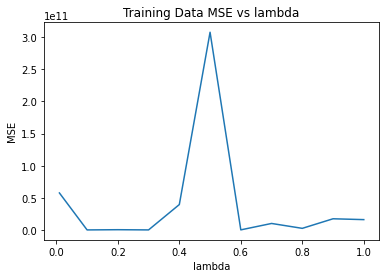

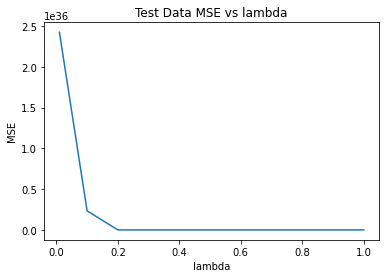

In [72]:
# Choose lambda
lamb = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
trMSE = []
teMSE = []
trPred = np.array(Train_Y)
tsPred = np.array(testY)
for i in range(len(lamb)):
    coeff = RidgeReg.RidgeCoeff(lamb[i], M1, Id, M2)
    trainPred = RidgeReg.RidgePred(coeff, Train_A)
    np.append(trPred, trainPred)
    testPred = RidgeReg.RidgePred(coeff, testA)
    np.append(tsPred, testPred)
    trainMSE = np.square(np.subtract(Train_Y, trainPred)).mean()
    testMSE = np.square(np.subtract(testY, testPred)).mean()
    trMSE.append(trainMSE)
    teMSE.append(testMSE)

#plot training mse with lambda
fig = plt.figure()
plt.xlabel('lambda')
plt.ylabel('MSE')
plt.title('Training Data MSE vs lambda')
plt.plot(lamb, trMSE)
plt.show()

#plot test mse with lambda
fig = plt.figure()
plt.xlabel('lambda')
plt.ylabel('MSE')
plt.title('Test Data MSE vs lambda')
plt.plot(lamb, teMSE)
plt.show()

In [73]:
# Select best lambda
print('Best lambda is %f' % (lamb[np.argmin(teMSE)]))
print('MSE on training data for best lambda is %f' % (trMSE[np.argmin(teMSE)]))
print('MSE on test data for best lambda is %f' % (teMSE[np.argmin(teMSE)]))

Best lambda is 0.600000
MSE on training data for best lambda is 386761899.879563
MSE on test data for best lambda is 5653154391320914.000000


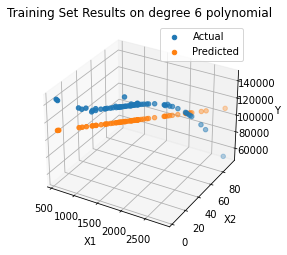

In [74]:
# Scatter plot of best model output vs expected output for training data
ind = np.argmin(teMSE)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Training Set Results on degree %d polynomial' % deg)
ax.scatter3D(Train_X1, Train_X2, Train_Y, 'blue')
ax.scatter3D(Train_X1, Train_X2, trPred[ind + 1], 'red')
plt.legend(['Actual', 'Predicted'])
plt.show()

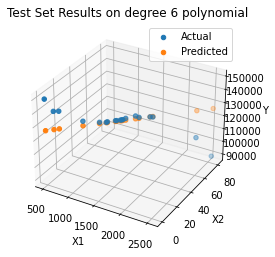

In [75]:
# Scatter plot of best model output vs expected output for testing data
ind = np.argmin(teMSE)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Test Set Results on degree %d polynomial' % deg)
ax.scatter3D(testX1, testX2, testY, 'blue')
ax.scatter3D(testX1, testX2, tsPred[ind + 1], 'red')
plt.legend(['Actual', 'Predicted'])
plt.show()